In [ ]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils


# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using TensorFlow backend.


First we import the data from the Keras dataset. For this project we are going to use the fashion mist dataset. This data contained a training set of 60,000 examples and a test set of 10,000. The examples are a 28X28 gray images, which can be label from 10 classes.

In [ ]:
from keras.datasets import fashion_mnist

**Upload data and studying it** 

From the upload data we obtained the variables for the X_train, Y_train and the X_test and Y_test.

In [ ]:
(X_train,Y_train), (X_test,Y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


Text(0.5, 1.0, 'Ground Truth : 9')

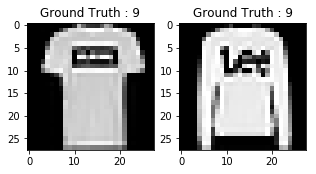

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[1,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[1,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[0]))

After importing the data we can see the dimention of the image 

In [ ]:
print('Training data shape : ', X_train.shape, Y_train.shape)

print('Testing data shape : ', X_test.shape, Y_test.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


From this we check that we have 60000 trained samples and 10000 testing samples and that each one has a dimension of 28X28.

---



From the images shown above, we can see that the images are in gray scale and have a pixel values that goes from 0 to 255 and a size of 28X28, so in this case we need to:

*   Convert each image into a matrix of 28X28X1
*   Convert the data format from int8 to float32
*   Rescale the pixel for values beetween 0-1







First of all we rescale the image to 28X28X1, since for doing the convolutional network the image need to have a dimension of 28(height)X28(Breadth)X1(Number of channels)

In [ ]:
X_train = X_train.reshape(-1, 28,28, 1)
X_test  = X_test.reshape(-1, 28,28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Then we change the format to float32 using the function astype. 
Then we divide this number between 255 in order to have a pixel value that goes from 0 to 1.

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.

# **Now we need to do one hot encoding vector.**





Now we have that the labels for the images is only a number (integer), so we need to encode this to a vector. For doing this we are going to use numpy utility which is to categorical. 

In [ ]:
transformed_Y_train = np_utils.to_categorical(Y_train)
transformed_Y_test = np_utils.to_categorical(Y_test)

In [ ]:
# Change the labels from categorical to one-hot encoding
Y_train_encode = to_categorical(Y_train)
Y_test_encode = to_categorical(Y_test)

# Let's print the original label and the label using one-hot encoding.
print('Original label:', Y_train[0])
print('After conversion to one-hot:', Y_train_encode[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Now we need to split the data in two parts, one part for training and the other for validation. 



*   Lets train 80% of the trained data and validate it on 20%.




In [ ]:

X_train,X_valid,train_label,valid_label= train_test_split(X_train, Y_train_encode, test_size=0.2, random_state=13 )


# **Creating the network**

In [ ]:
#Batch size is the number of samples processed before the model is updated, the batch size should be greater or equal to one and smaller than the number of trained 
#samples in the dataset
batch_size = 128
#Epoch is the number of complete passes through the training data. This can be between 1 and infitite. 
epochs = 20
num_classes = 10

For this model, we are going to use a 2D convolutional layer and a maxpooling2D.

**The convolutional layer 2D**


**Pooling layer**

The pooling layer reduce the spatial size of the convolved feature, in order to reduce the computational power through the reduction of dimentionality. It reduce the dimentionality of images by reducing the number of pixels.  Also, it is useful for extracting dominant features. There are diferent pooling. the one I am using is the max pooling, it returns the maximum value from the portion of the image converted by the kernel.

Using three convolutional layers where:
In the first layer we have 32 3X3 filters, 
in the second, 64 3X3 filters and 
in the last one 128 3X3 filters. 
Additional to this we put three max-pooling layers of size 2X2

In [ ]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

W0827 07:26:11.389356 140594825811840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 07:26:11.424993 140594825811840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 07:26:11.431691 140594825811840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 07:26:11.473642 140594825811840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Compile the model

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

W0827 07:26:11.564351 140594825811840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0827 07:26:11.575227 140594825811840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [ ]:
fashion_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

Train the model using keras

In [ ]:
fashion_train = fashion_model.fit(X_train, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_valid, valid_label))


W0827 07:26:11.722959 140594825811840 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0827 07:26:11.795325 140594825811840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 81s 2ms/step - loss: 0.5258 - acc: 0.8074 - val_loss: 0.3573 - val_acc: 0.8695
Epoch 2/20
48000/48000 [==============================] - 80s 2ms/step - loss: 0.3144 - acc: 0.8855 - val_loss: 0.3123 - val_acc: 0.8896
Epoch 3/20
48000/48000 [==============================] - 80s 2ms/step - loss: 0.2658 - acc: 0.9025 - val_loss: 0.2740 - val_acc: 0.9008
Epoch 4/20
48000/48000 [==============================] - 80s 2ms/step - loss: 0.2388 - acc: 0.9124 - val_loss: 0.2471 - val_acc: 0.9120
Epoch 5/20
48000/48000 [==============================] - 80s 2ms/step - loss: 0.2105 - acc: 0.9241 - val_loss: 0.2497 - val_acc: 0.9082
Epoch 6/20
48000/48000 [==============================] - 81s 2ms/step - loss: 0.1916 - acc: 0.9301 - val_loss: 0.2332 - val_acc: 0.9143
Epoch 7/20
48000/48000 [==============================] - 80s 2ms/step - loss: 0.1718 - acc: 0.9354 - val_loss: 0.2568 - val_acc

Now we are going to evaluate the model, in order to do the plots for the accurancy and the loss comparing the training and the validating data. 

In [ ]:
test_eval = fashion_model.evaluate(X_test, Y_test_encode, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4065499418217689
Test accuracy: 0.9177


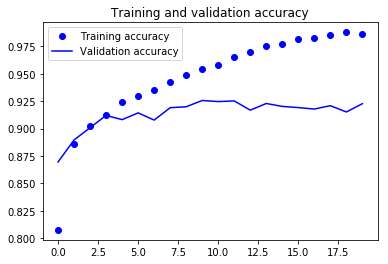

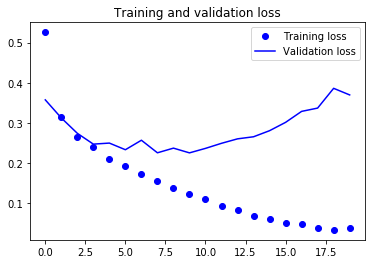

In [ ]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

From the above plots we can see that after 4.5 epocs aprox the system start memorizing the data. So, in order to overcome this problem we are going to add a dropout layer.

In [ ]:
batch_size = 128
epochs = 20
num_classes = 10

In [ ]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=X_train.shape[1:]))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

W0827 07:53:04.892314 140594825811840 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
fashion_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [ ]:
fashion_train_dropout = fashion_model.fit(X_train, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_valid, valid_label))


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 88s 2ms/step - loss: 0.6689 - acc: 0.7496 - val_loss: 0.3930 - val_acc: 0.8567
Epoch 2/20
48000/48000 [==============================] - 88s 2ms/step - loss: 0.4061 - acc: 0.8515 - val_loss: 0.3368 - val_acc: 0.8772
Epoch 3/20
48000/48000 [==============================] - 88s 2ms/step - loss: 0.3529 - acc: 0.8709 - val_loss: 0.3090 - val_acc: 0.8866
Epoch 4/20
48000/48000 [==============================] - 88s 2ms/step - loss: 0.3185 - acc: 0.8839 - val_loss: 0.2890 - val_acc: 0.8924
Epoch 5/20
48000/48000 [==============================] - 88s 2ms/step - loss: 0.2961 - acc: 0.8912 - val_loss: 0.2671 - val_acc: 0.9018
Epoch 6/20
48000/48000 [==============================] - 88s 2ms/step - loss: 0.2805 - acc: 0.8959 - val_loss: 0.2591 - val_acc: 0.9044
Epoch 7/20
48000/48000 [==============================] - 88s 2ms/step - loss: 0.2675 - acc: 0.9009 - val_loss: 0.2503 - val_acc

In [ ]:
test_eval = fashion_model.evaluate(X_test, Y_test_encode, verbose=1)

10000/10000 [==============================] - 5s 503us/step


In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.21355641158521174
Test accuracy: 0.9237


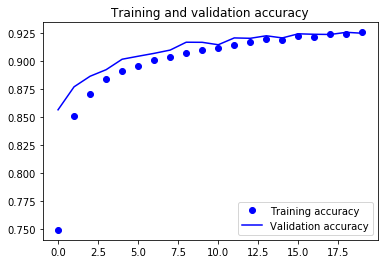

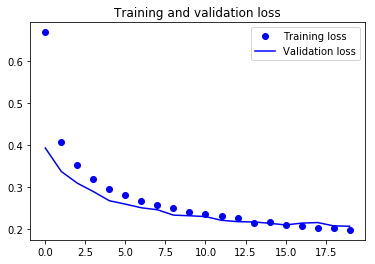

In [ ]:
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
predicted_classes = fashion_model.predict(X_test)


In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


In [ ]:
correct = np.where(predicted_classes==Y_test)[0]
print  (len(correct))


9188


In [ ]:
incorrect = np.where(predicted_classes!=Y_test)[0]
print (len(incorrect))


812


Classification Report

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(Y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.77      0.91      0.84      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.90      0.88      0.89      1000
     Class 3       0.94      0.89      0.92      1000
     Class 4       0.85      0.91      0.88      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.83      0.70      0.76      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



**Training dataset images using augmentation **

In [ ]:
from keras import backend as K
from keras.layers import Conv2D, Lambda, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten




if K.backend() != 'tensorflow':
    raise RuntimeError('')

    
import tensorflow as tf  
    

def augment_2d(inputs, rotation=0, horizontal_flip=False, vertical_flip=False):

    if inputs.dtype != tf.float32:
        inputs = tf.image.convert_image_dtype(inputs, dtype=tf.float32)

    with tf.name_scope('augmentation'):
        shp = tf.shape(inputs)
        batch_size, height, width = shp[0], shp[1], shp[2]
        width = tf.cast(width, tf.float32)
        height = tf.cast(height, tf.float32)

        transforms = []
        identity = tf.constant([1, 0, 0, 0, 1, 0, 0, 0], dtype=tf.float32)

        if rotation > 0:
            angle_rad = rotation * 3.141592653589793 / 180.0
            angles = tf.random_uniform([batch_size], -angle_rad, angle_rad)
            f = tf.contrib.image.angles_to_projective_transforms(angles,
                                                                 height, width)
            transforms.append(f)

        if horizontal_flip:
            coin = tf.less(tf.random_uniform([batch_size], 0, 1.0), 0.5)
            shape = [-1., 0., width, 0., 1., 0., 0., 0.]
            flip_transform = tf.convert_to_tensor(shape, dtype=tf.float32)
            flip = tf.tile(tf.expand_dims(flip_transform, 0), [batch_size, 1])
            noflip = tf.tile(tf.expand_dims(identity, 0), [batch_size, 1])
            transforms.append(tf.where(coin, flip, noflip))

        if vertical_flip:
            coin = tf.less(tf.random_uniform([batch_size], 0, 1.0), 0.5)
            shape = [1., 0., 0., 0., -1., height, 0., 0.]
            flip_transform = tf.convert_to_tensor(shape, dtype=tf.float32)
            flip = tf.tile(tf.expand_dims(flip_transform, 0), [batch_size, 1])
            noflip = tf.tile(tf.expand_dims(identity, 0), [batch_size, 1])
            transforms.append(tf.where(coin, flip, noflip))

    if transforms:
        f = tf.contrib.image.compose_transforms(*transforms)
        inputs = tf.contrib.image.transform(inputs, f, interpolation='BILINEAR')
    return inputs



In [ ]:
batch_size = 128
epochs = 20
num_classes = 10




In [ ]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:],padding='same'))
fashion_model.add(Activation('relu'))
fashion_model.add(Conv2D(32, (3, 3)))
fashion_model.add(Activation('relu'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(64, (3, 3), padding='same'))
fashion_model.add(Activation('relu'))
fashion_model.add(Conv2D(64, (3, 3)))
fashion_model.add(Activation('relu'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
fashion_model.add(Dropout(0.25))

fashion_model.add(Flatten())
fashion_model.add(Dense(512))
fashion_model.add(Activation('relu'))
fashion_model.add(Dropout(0.5))
fashion_model.add(Dense(num_classes))
fashion_model.add(Activation('softmax'))

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
def create_datagen(train_X):
    data_generator = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.02,
        height_shift_range=0.02,
        horizontal_flip=True)
    data_generator.fit(train_X)
    return data_generator

In [ ]:
create_datagen(X_train)

In [ ]:
data_generator = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.02,
        height_shift_range=0.02,
        horizontal_flip=True)
data_generator.fit(X_train)

In [ ]:
fashion_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
fashion_model.fit_generator(data_generator.flow(X_train, train_label, batch_size=batch_size),
                    steps_per_epoch=len(X_train)//32,
                    epochs=epochs,
                    validation_data=(X_valid, valid_label),
                    verbose=1)


Epoch 1/20
1500/1500 [==============================] - 634s 423ms/step - loss: 0.8047 - acc: 0.7042 - val_loss: 0.5272 - val_acc: 0.8071
Epoch 2/20
1500/1500 [==============================] - 632s 421ms/step - loss: 0.5389 - acc: 0.7989 - val_loss: 0.4457 - val_acc: 0.8387
Epoch 3/20
1500/1500 [==============================] - 632s 421ms/step - loss: 0.4614 - acc: 0.8285 - val_loss: 0.3777 - val_acc: 0.8625
Epoch 4/20
1500/1500 [==============================] - 630s 420ms/step - loss: 0.4109 - acc: 0.8477 - val_loss: 0.3427 - val_acc: 0.8752
Epoch 5/20
1500/1500 [==============================] - 630s 420ms/step - loss: 0.3770 - acc: 0.8613 - val_loss: 0.3401 - val_acc: 0.8798
Epoch 6/20
1500/1500 [==============================] - 626s 417ms/step - loss: 0.3545 - acc: 0.8698 - val_loss: 0.3200 - val_acc: 0.8856
Epoch 7/20
1500/1500 [==============================] - 620s 413ms/step - loss: 0.3377 - acc: 0.8751 - val_loss: 0.3055 - val_acc: 0.8907
Epoch 8/20
1500/1500 [============

In [ ]:
test_eval = fashion_model.evaluate(X_test, Y_test_encode, verbose=1)

10000/10000 [==============================] - 9s 858us/step


In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.25556311938762666
Test accuracy: 0.9086
